## Final Report 

# **Predicting Heart Disease Presence using Cleveland Heart Disease Dataset**

#### Chili, Alaire, Stella, Howard

## **Introduction**

According to the CCDSS, 14 Canadian adults (20 and over) with diagnosed heart disease die every hour (Canada, 2022), and incidences of sudden cardiac death (SCD) in athletes range from 1 in 40,000 to 1 in 80,000 athletes per year (Wasfy et al., 2016). These statistics underscore the urgency of implementing effective prevention strategies. With heart disease being the second leading cause of mortality in Canada (Dai et al., 2021), early detection and diagnosis remain a crucial first step in improving patient outcomes. In this proposal, the K-Nearest Neighbors (k-NN) algorithm is used on the Cleveland Heart Disease dataset for binary classification of heart disease based on the predictive variables of age, sex (1 = male; 0 = female), chest pain type (1-4), and resting blood pressure (mm Hg). By leveraging existing data, we aim to train our model to deliver rapid and accurate heart disease diagnoses to alleviate physician workload. This change will enable them to dedicate more time to direct patient interactions, improving patient and physician quality of life.

## **Methods**


### Data Preparation and Cleaning
We initiated our analysis by loading the necessary R packages and reading the Cleveland Heart Disease dataset from a web source using the ‘read_csv’ function. The dataset initially lacked column names, so we manually assigned them to ensure accurate processing. Next, we addressed missing values in the dataset, which were denoted by "?". We replaced these with "NA" to facilitate correct data processing in R. We also converted several variables expected to be categorical into factor variables. Specifically, the variables "sex", "fbs", "restecg", "exang", "thal", "ca", and "slope" were converted to factors. The response variable, initially labeled as "num", was transformed into a binary factor variable named "diag", with values of 0 representing "Absent" and values greater than 0 representing "Present" heart disease.

### Exploratory Data Analysis
We performed an exploratory data analysis (EDA) to understand the dataset's characteristics. We summarized the data by computing the means of the predictor variables "cp" and "trestbps" across the two diagnostic classes ("FALSE" and "TRUE") of heart disease. The summary revealed that higher average resting blood pressure (avg_trestbps) and chest pain type (avg_cp) were associated with a higher likelihood of heart disease. Furthermore, we visualized the relationship between chest pain type (cp) and resting blood pressure (trestbps) using a bar plot. This visualization aimed to compare the distributions of these predictor variables across the two diagnostic classes.

### Data Splitting
To develop our predictive model, we divided the dataset into a training set and a testing set using the ‘initial_split’ function. 75% of the data was allocated to the training set, and 25% for testing.

### Model Development
We standardized the predictor variables, "cp" and "trestbps", by scaling them to unit variance and centering them to zero mean. This standardization is crucial for distance-based algorithms like k-NN to ensure that attributes with larger ranges do not dominate the distance calculations. We specified the k-NN model with a rectangular weight function and set the number of neighbors to be tuned dynamically. The model was configured for classification using the ‘kknn’ engine. To determine the optimal number of neighbors (k), we performed 10-fold cross-validation on the training dataset, stratifying by the "diag" outcome to ensure balanced sampling. A grid of potential values for k ranging from 1 to 100 was prepared. The model was tuned across these values to identify the optimal k value that maximizes accuracy.

## **Results**

### Model Evaluation
After tuning the k-NN model, we collected accuracy metrics for each model configuration, focusing on accuracy as the primary performance measure. The top-performing configurations were identified based on the highest average accuracy. Among them, the 11th neighbor yielded the highest average accuracy of approximately 77.24%.

### Final Model
With the optimal k value determined (k=11), we finalized our k-NN model. We fitted the model to the training dataset using the specified k value and other configurations.

### Model Testing
We evaluated the performance of our final k-NN model on the testing set. The overall accuracy of the model was found to be approximately 76.92%. The confusion matrix revealed that the model correctly classified 36 cases of "Absent" heart disease and 24 cases of "Present" heart disease, while misclassifying 12 cases of "Absent" heart disease as "Present" and 6 cases of "Present" heart disease as "Absent".

In [1]:
#Load all the package that we need
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(rsample)   
library(caret)     
library(pROC)  
library(dplyr)
library(ggplot2)
install.packages("caret")
library(caret)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Lodading Packages 

### Reading data
We used `"read_csv"` function to import the Cleveland Heart Disease dataset. The dataset contains 303 patient records and 14 clinical attributes. The dataset was initially loaded without column names, so we manually assigned names to each clinical attribute to ensure accurate data processing and analysis.

### Data cleaning and tidying
Upon initial inspection, we found that missing values were denoted by "? ", so we converted the missing values to "NA" to ensure that R could be processed and analyzed correctly. Certain variables (e.g., gender, fbs, restecg, exang, thal, ca, and slope) were expected to be categorical in nature, so we converted them to factor variables. Finally, we converted the response variable num into a binary factor called diag, where 0 corresponds to "FALSE" for no heart disease and 1 through 4 correspond to "TRUE" for heart disease. The purpose of converting the "num" column to the binary "diag" column was to simplify the dataset, bring clarity to the standardized treatment protocols, and ensure consistent care for patients across a variety of providers.

In [3]:
cleveland_data<-read_csv( "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                col_names=c("age",
                     "sex",
                     "cp",
                     "trestbps",
                     "chol",
                     "fbs",
                     "restecg",
                     "thalach",
                     "exang",
                     "oldpeak",
                     "slope",
                     "ca",
                     "thal",
                     "num")) 

set.seed(123)
#Now we can cleaning and wrangling data
cleveland_data[cleveland_data == "?"] <- NA

# Convert necessary columns to appropriate types
cleveland_tidy <- cleveland_data|>
  mutate(across(c("sex", "fbs", "restecg", "exang", "thal", "ca", "slope"), as.factor)) %>%
  mutate(
    num = as.numeric(num), 
    diag = factor(ifelse(is.na(num), NA, num > 0))) 

head(cleveland_tidy) 



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE


 ##### Table 1

### Splitting data into training and testing sets
In preparing the Cleveland dataset for the development of the predictive model, we divided the dataset into a training subset and a testing subset. This is a critical step as it ensures that the model is trained on a comprehensive and representative portion of the data, while also reserving a separate portion for model evaluation to validate its predictive accuracy. The data set was partitioned using the `"initial_split"` function. This function assigns about 75% of the data to the training set and the remaining 25% to the test set.

In [4]:
#Splitting dataframe into training and testing datasets
cleveland_split<-initial_split(cleveland_tidy,prop=3/4,strata=num)
cleveland_training<-training(cleveland_split)
cleveland_testing<-testing(cleveland_split)


head(cleveland_training)

nrow(cleveland_training)
nrow(cleveland_testing)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,FALSE
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0,FALSE


[1] 225

[1] 78

##### Table 2

### Summarizing the data
We can use the `"group_by"` and `"summarize"` functions to determine whether "cp" and " trestbps" are related to the diagnosis of heart disease ("diag"). So we can use `“mean”` to find their average value to confirm it. By comparing the data we can see that higher avg_trestbps increases the probability of having a heart attack while higher avg_cp may affect the diagnosis rate (note: cp stands for different types of chest painValue 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic).

In [5]:
cleveland_summary <- cleveland_training|>
  group_by(diag)|>
  summarize(
    avg_cp = mean(cp, na.rm=TRUE),
    avg_trestbps = mean(trestbps, na.rm = TRUE),
    count = n())
cleveland_summary

diag,avg_cp,avg_trestbps,count
<fct>,<dbl>,<dbl>,<int>
FALSE,2.827869,128.9836,122
TRUE,3.553398,135.4757,103


##### Table 3

### Visualization of Chest Pain Types and Resting Blood Pressure in Heart Disease Diagnosis

To visualize, we will use `"ggplot"` function to generate a scatter plot.

This scatterplot shows the distribution of resting blood pressure in patients with different chest pains in relation to their cardiac diagnosis status. Although there was a trend toward higher blood pressure in patients diagnosed with cardiac disease, the overlap between the groups highlights the complexity of using these variables as independent predictors. The results of this visualization study provide a basis for more in-depth analysis and reaffirm the need for different diagnostic approaches in clinical practice.

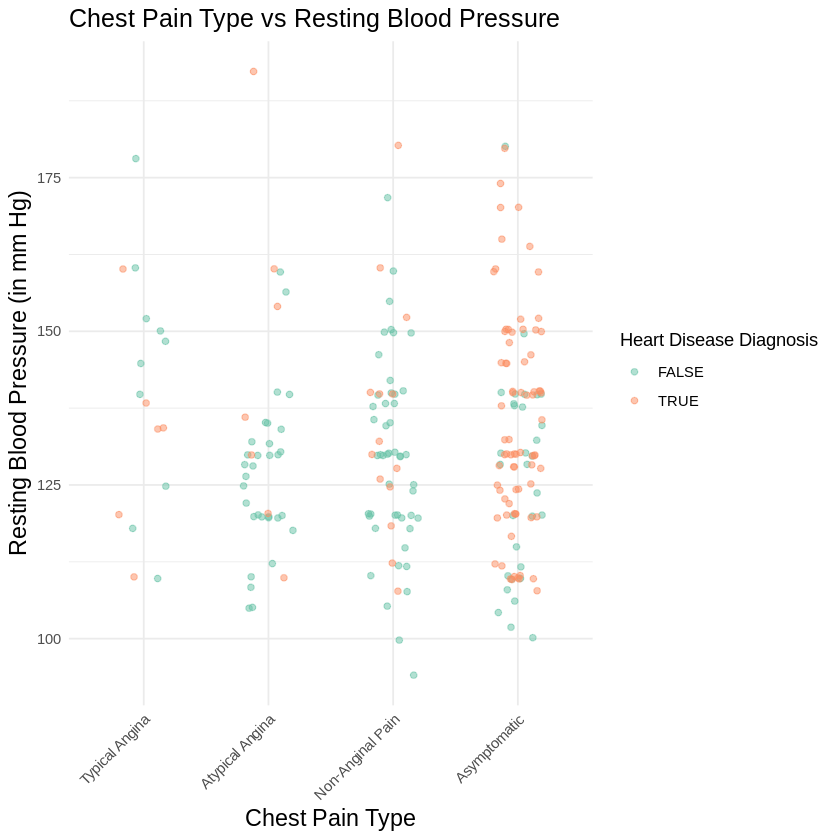

In [13]:
# Set seed for reproducibility of jitter
set.seed(123)

# Generate the plot
cleveland_plot <- cleveland_training %>%
  ggplot(aes(x = factor(cp, labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")),
             y = trestbps, color = diag)) +
  geom_jitter(alpha = 0.5, width = 0.2) +  # Add horizontal jitter with reproducibility
  labs(title = "Chest Pain Type vs Resting Blood Pressure",
       x = "Chest Pain Type",
       y = "Resting Blood Pressure (in mm Hg)",
       color = "Diagnosis") +
  scale_color_brewer(palette = "Set2") +  # Adjust the color scheme
  theme_minimal() +
  theme(
    plot.title = element_text(size = 15),
    axis.title = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1)
  ) +
  guides(color = guide_legend(title = "Heart Disease Diagnosis")) # Add legend title

cleveland_plot


##### Figure 1

### Model Development and Optimization Using k-Nearest Neighbors
We initialized our modeling process by standardizing the predictors (cp and trestbps). This was achieved through scaling (to unit variance) and centering (to zero mean) using the recipe function. Such standardization is crucial in distance-based algorithms like k-NN to prevent attributes with naturally larger ranges from dominating the distance calculations.he k-NN model was specified with a rectangular weight function, and the number of neighbors was set to be tuned dynamically.  We employed the kknn engine, well-suited for this kind of model, and configured the model for classification To validate our model, we performed 10-fold cross-validation on the training dataset, stratifying by the diag outcome to ensure balanced sampling within each fold. This method helps in evaluating the model's performance and robustness effectively. A grid of potential values for k (ranging from 1 to 100) was prepared. We tuned the model across these values to find the optimal number of neighbors that maximizes accuracy, which is essential for achieving the best balance between bias and variance.

### Evaluation and Results
After tuning, we collected accuracy metrics for each model configuration, focusing on the accuracy as the primary performance measure.  The accuracy metrics were filtered and sorted to identify the top configurations. This helped in selecting the best k value based on empirical evidence.
### Top Performing ModelsThe analysis of the highest results shows that the configurations with the highest accuracy metrics provide the most efficient settings for our k-NN model. We extracted the first 5 configurations for detailed comparison showing that the 11th neighbor has the highest average accuracy of about 77.24%, indicating it as the most suitable choice for this dataset and model. 
..


In [72]:
set.seed(123)

#Performing Standardization
cleveland_recipe<-recipe(diag~ cp+trestbps, data=cleveland_training)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
            set_engine("kknn")|>
            set_mode("classification")

# Perform 10 fold-cross valdiation
cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = diag)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow and tune
knn_results <- workflow()|>
      add_recipe(cleveland_recipe)|>
      add_model(knn_tune)|>
      tune_grid(resamples = cleveland_vfold, grid = gridvals)|>

# Collect metrics and filter for accuracy
      collect_metrics()|>
      filter(.metric == "accuracy")|>
      select(neighbors, mean)|>
      arrange(desc(mean))

# Check top results for the best number of neighbors
top_results <- knn_results|>
      arrange(desc(mean))|>
      slice_head(n = 5)

head(top_results)

neighbors,mean
<int>,<dbl>
11,0.7724144
12,0.7682477
85,0.7555665
86,0.7510211
87,0.7510211


##### Table 4

### Final Model Specification and Training
Finally, we have a value for K (k=11), we can now create `"neighbors = 11"`. Then we can fit our model to `"cleveland_training"`.


In [89]:
set.seed(123)

cleveland_final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 11)|>
    set_engine("kknn")|>
    set_mode("classification")

cleveland_fit <- workflow()|>
    add_recipe(cleveland_recipe)|>
    add_model(final_spec)|>
    fit(data = cleveland_training)

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2311111
Best kernel: rectangular
Best k: 11

##### Table 5.

### Testing our model
In the final stage, we will utilize a test set to test how well our model performs. To do this, We used the `"predict"` function to predict the diagnosis of heart disease (diag ) on the test set (cleveland_testing ). These predictions were combined with the actual diagnoses in the test set for a comprehensive evaluation. We then need to look at its accuracy using metrics and its confusion matrix using conf_mat. 

We computed the overall accuracy of the model, which was found to be approximately 76.92%. It reflects the proportion of total correct predictions made.
sea

This information is critical to understanding the diagnostic strengths and weaknesses of the model. Specifically, the relatively high number of false negatives may be of clinical concern because it represents underdiagnosis of heart disease. Conversely, the low false-negative rate suggests that the model is conservative, favoring underdiagnosis over overdiagnosis. These results demonstrate the potential of the k-NN model as a diagnostic tool, while also emphasizing the importance of continuous improvement and validation.
se.


In [94]:
set.seed(123)

#Predict the test sed
cleveland_predictions<-predict(fit, cleveland_testing)|>
               bind_cols(cleveland_testing)

metrics<- cleveland_predictions|>
    metrics(truth = diag, estimate = .pred_class)|>
    filter(.metric == "accuracy") 

metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<-cleveland_predictions|>
    conf_mat(truth = diag, estimate = .pred_class)
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7692308


          Truth
Prediction FALSE TRUE
     FALSE    36   12
     TRUE      6   24

##### Table 6

## **Discussion**

Results indicate that after tuning the model, the optimal k value was determined to be 11, which yielded the highest average accuracy of approximately 77.24%. The final k-NN model, fitted with the optimal k value, demonstrated an overall accuracy of approximately 76.92% on the testing set. The model correctly classified 36 cases of "Absent" heart disease and 24 cases of "Present" heart disease. However, it also misclassified 12 cases of "Absent" heart disease as "Present" and 6 cases of "Present" heart disease as "Absent." These findings suggest that the k-NN model shows potential in predicting heart disease.

The results align with our expectations, and a model to predict heart disease presence was successfully developed. However, the overall accuracy of approximately 76.92% on the testing set was slightly lower than expected.

These results provide a foundation for future research to build upon, potentially leading to further improvements in predicting heart disease using machine learning techniques. Such a model could enhance diagnostic accuracy by avoiding errors inherent in manual, case-by-case diagnoses. It relies on real-world case comparisons, potentially revolutionizing healthcare by allowing rapid diagnoses. For instance, doctors might only need to measure resting blood pressure upon admission, with all other features pre-filled (sex, age, chest pain type), benefitting patients with busy lifestyles. However, this raises questions about whether the dataset features are comprehensive enough for accurate diagnosis. Future research could focus on refining the model's performance by exploring additional features, such as genetic markers or lifestyle factors, that may enhance its predictive ability.

In conclusion, this study contributes to the ongoing efforts to utilize machine learning for predicting heart disease. By highlighting the strengths and limitations of the k-NN model, valuable insights for further research in this area were provided.

## **References**
(1) Canada, P. H. A. of. (2022, July 28). Heart Disease in Canada. Canada.ca. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html (2) Wasfy, M. M., Hutter, A. M., & Weiner, R. B. (2016). Sudden cardiac death in athletes. Methodist DeBakey cardiovascular journal. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4969030/ (3) Dai, H., Younis, A., Kong, J. D., Bragazzi, N. L., & Wu, J. (2021). Trends and Regional Variation in Prevalence of Cardiovascular Risk Factors and Association With Socioeconomic Status in Canada, 2005-2016. JAMA network open, 4(8), e2121443. https://doi.org/10.1001/jamanetworkopen.2021.21443 (4) Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.